In [1]:
from astropy.io import fits
import astropy.units as u
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from scipy.signal import resample

from rascal.calibrator import Calibrator
from rascal.util import refine_peaks

%matplotlib inline

/Users/marcolam/git/rascal/rascal/calibrator.py:21: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


Info: https://www.eso.org/sci/facilities/lasilla/instruments/efosc/inst/Perf_HeAr.html

Manual: https://www.eso.org/sci/facilities/lasilla/instruments/efosc/doc/manual/EFOSC2manual_v4.2.pdf

Grism #11

In [2]:
data = fits.open('data_eso36_efosc/EFOSC_spec_HeAr227_0005.fits')[0]

<ipython-input-3-89877954d32b>:2: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(data.data.T), aspect='auto', origin='lower')


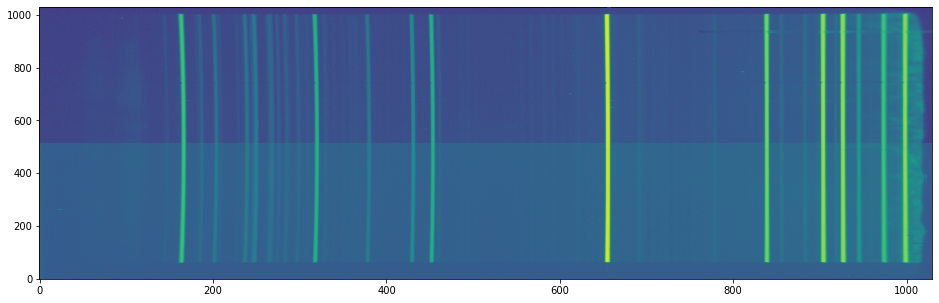

In [3]:
plt.figure(1, figsize=(16,5))
plt.imshow(np.log(data.data.T), aspect='auto', origin='lower')

In [4]:
spectrum = np.median(data.data.T, axis=0)
peaks, _ = find_peaks(spectrum, prominence=20, distance=10, threshold=None)
peaks_refined = refine_peaks(spectrum, peaks, window_width=3)

INFO:rascal.calibrator:num_pix is set to None.
INFO:rascal.calibrator:pixel_list is set to None.
INFO:rascal.calibrator:Plotting with matplotlib.
INFO:rascal.calibrator:num_pix is set to 1030.
INFO:rascal.calibrator:pixel_list is set to None.
INFO:rascal.calibrator:Plotting with matplotlib.


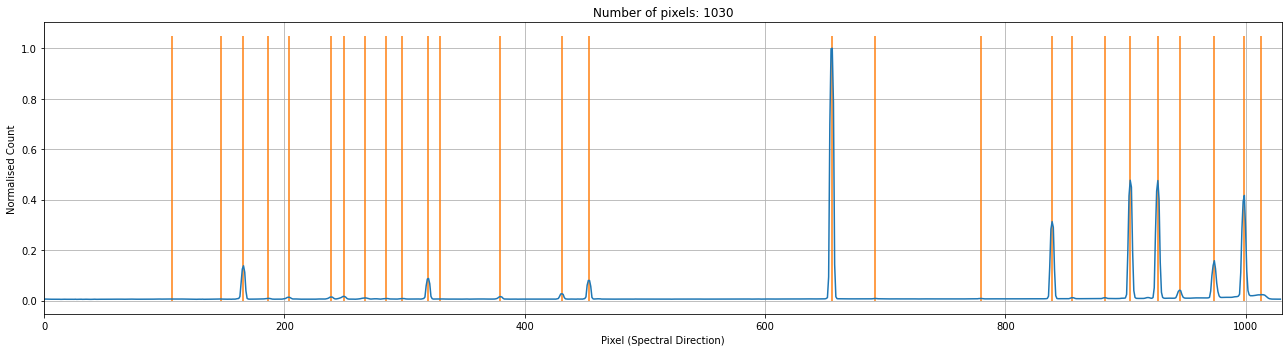

In [5]:
c = Calibrator(peaks_refined, spectrum)

c.set_calibrator_properties(num_pix=len(spectrum),
                            plotting_library='matplotlib',
                            log_level='info') 

c.plot_arc()

In [6]:
c.set_hough_properties(num_slopes=5000,
                       xbins=100,
                       ybins=100,
                       min_wavelength=3500.,
                       max_wavelength=7500.,
                       range_tolerance=500.,
                       linearity_tolerance=50)
c.add_atlas(["He"])
c.add_atlas(["Ar"], min_intensity=20)

c.set_known_pairs(998.53393246, 7053.9)

c.set_ransac_properties(sample_size=5,
                        top_n_candidate=5,
                        linear=True,
                        filter_close=True,
                        ransac_tolerance=5,
                        candidate_weighted=True,
                        hough_weight=1.0)
c.do_hough_transform()

INFO:rascal.calibrator:Peak at: 3678.3699930072657 A
INFO:rascal.calibrator:Peak at: 3821.1967583493683 A
INFO:rascal.calibrator:- matched to 3819.5927734375 A
INFO:rascal.calibrator:Peak at: 3888.1683969525975 A
INFO:rascal.calibrator:- matched to 3888.63134765625 A
INFO:rascal.calibrator:Peak at: 3963.45769591212 A


INFO:rascal.calibrator:- matched to 3964.71044921875 A
INFO:rascal.calibrator:Peak at: 4025.912532852757 A
INFO:rascal.calibrator:- matched to 4026.1708984375 A
INFO:rascal.calibrator:Peak at: 4158.370250789476 A
INFO:rascal.calibrator:Peak at: 4198.520453932983 A
INFO:rascal.calibrator:Peak at: 4266.072680910213 A
INFO:rascal.calibrator:Peak at: 4335.187916738332 A
INFO:rascal.calibrator:Peak at: 4387.562538262603 A
INFO:rascal.calibrator:- matched to 4387.900390625 A
INFO:rascal.calibrator:Peak at: 4471.446952076545 A
INFO:rascal.calibrator:- matched to 4471.44873046875 A
INFO:rascal.calibrator:Peak at: 4512.593193792814 A
INFO:rascal.calibrator:- matched to 4510.70068359375 A
INFO:rascal.calibrator:Peak at: 4713.118437484955 A
INFO:rascal.calibrator:- matched to 4713.1083984375 A
INFO:rascal.calibrator:Peak at: 4923.515371699338 A
INFO:rascal.calibrator:- matched to 4921.88916015625 A
INFO:rascal.calibrator:Peak at: 5018.215462483747 A
INFO:rascal.calibrator:- matched to 5015.634277

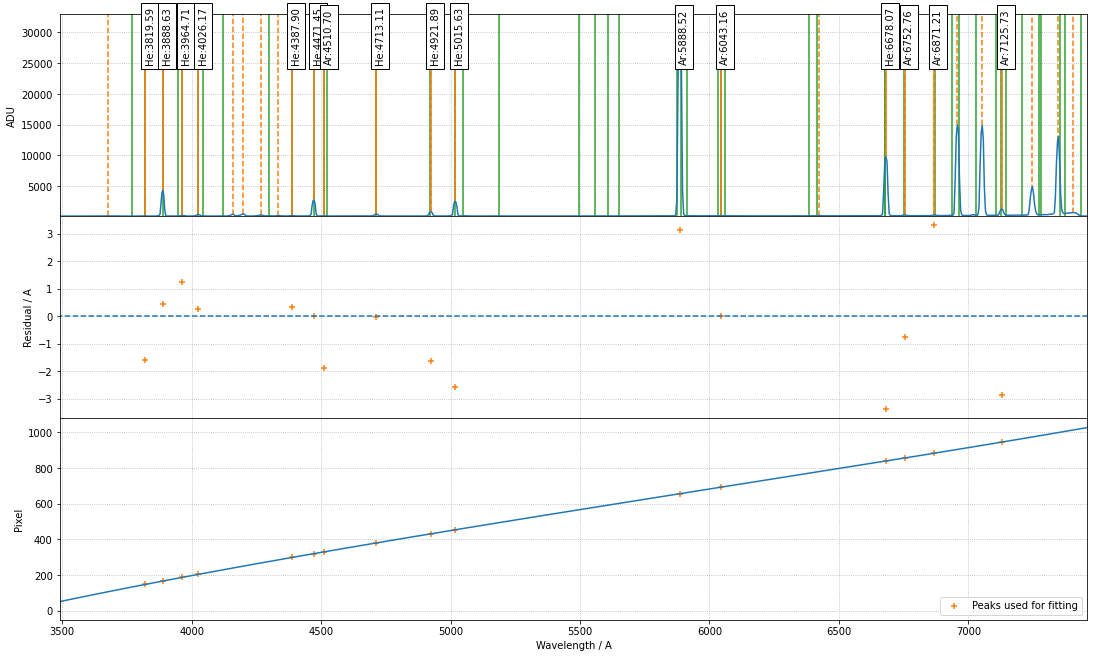

Stdev error: 1.2057064922116218 A
Peaks utilisation rate: 66.66666666666666%


In [7]:
best_p, rms, residual, peak_utilisation = c.fit(max_tries=1000)

c.plot_fit(best_p, plot_atlas=True, log_spectrum=False, tolerance=5.0, renderer='notebook')


rms = np.sqrt(np.sum(residual**2 / len(residual)))

print("Stdev error: {} A".format(np.abs(residual).std()))
print("Peaks utilisation rate: {}%".format(peak_utilisation*100))

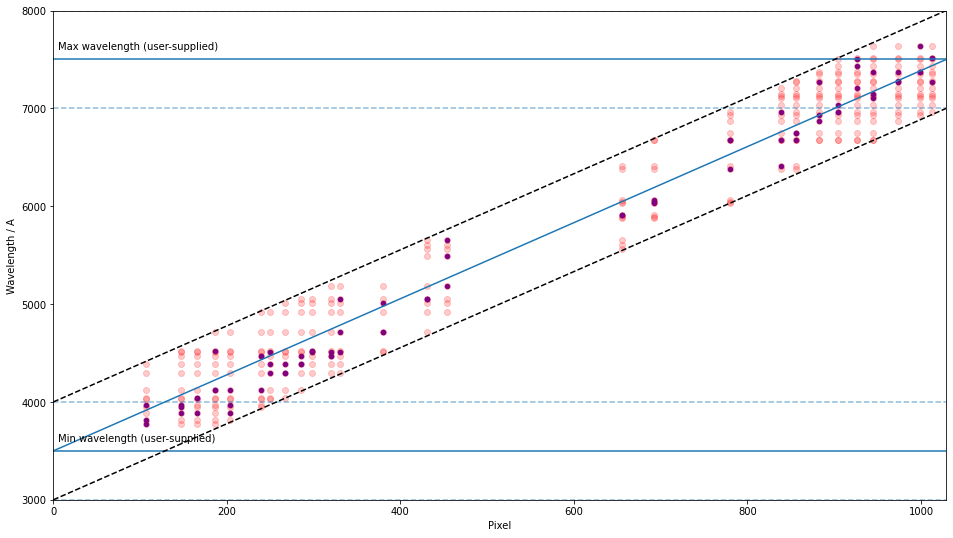

In [8]:
c.plot_search_space()